In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

def load_and_prepare_data(url):
    """
 Load the dataset and prepare the data by converting the 'date' column into the correct format
    
    """
    df = pd.read_csv(url)
    df['date'] = pd.to_datetime(df['date'], format='%d-%b-%Y', errors='coerce')
    return df

def plot_incidents_by_country(df):
    """
  Create a bar chart to visualize the number of incidents per country (Top 10)
    """
    incidents_by_country = df['country'].value_counts().head(10)
    plt.figure(figsize=(12, 6))
    sns.barplot(x=incidents_by_country.values, y=incidents_by_country.index, palette='viridis')
    plt.title('Numero di Incidenti per Nazione (Top 10)')
    plt.xlabel('Numero di Incidenti')
    plt.ylabel('Nazione')
    plt.show()

def plot_incidents_by_day(df):
    """
   Create a bar chart to visualize the frequency of incidents during the week

    """
    df['day_of_week'] = df['date'].dt.day_name()
    incidents_by_day = df['day_of_week'].value_counts()
    plt.figure(figsize=(10, 6))
    sns.barplot(x=incidents_by_day.index, y=incidents_by_day.values, order=['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'], palette='mako')
    plt.title('Frequenza degli Incidenti durante la Settimana')
    plt.xlabel('Giorno della Settimana')
    plt.ylabel('Numero di Incidenti')
    plt.show()

def plot_safe_operators(df):
    """
    Create a horizontal bar chart to visualize the safest operators
    """
    df['fatalities'] = pd.to_numeric(df['fatalities'], errors='coerce')
    df = df.dropna(subset=['fatalities'])
    safe_operators = df.groupby('operator')['fatalities'].sum().sort_values(ascending=False).head(10)
    plt.figure(figsize=(12, 6))
    ax = safe_operators.plot(kind='barh', color='skyblue')
    plt.title('Operatori più Sicuri (Meno Fatalità)')
    plt.xlabel('Numero di Fatalità')
    plt.ylabel('Operatore')
    for index, value in enumerate(safe_operators):
        ax.text(value, index, str(value))
    plt.show()



def plot_post_9_11_incidents(df):
    """
    Create a bar chart to visualize the number of incidents after September 11th per year.

    """
    post_9_11_incidents = df[df['date'] >= '2001-09-11']
    incident_count_by_year = post_9_11_incidents['date'].dt.year.value_counts().sort_index()
    plt.figure(figsize=(12, 6))
    incident_count_by_year.plot(kind='bar', color='green')
    plt.title('Numero di Incidenti dopo l\'11 Settembre per Anno')
    plt.xlabel('Anno')
    plt.ylabel('Numero di Incidenti')
    plt.show()
def Aircraft_Types_with_Highest_Number_of_Fatalities(df):
    """
    Plot a bar chart to visualize the aircraft types with the highest number of fatalities.

    """


    df['fatalities'] = pd.to_numeric(df['fatalities'], errors='coerce')


    fatalities_by_aircraft_type = df.groupby('type')['fatalities'].sum().sort_values(ascending=False).head(10)


    plt.figure(figsize=(12, 6))
    fatalities_by_aircraft_type.plot(kind='bar', color='salmon')
    plt.title('Tipi di Velivolo con il Maggior Numero di Morti')
    plt.xlabel('Tipo di Velivolo')
    plt.ylabel('Numero Totale di Morti')
    plt.show()

def Temporal_Distribution_of_Aircraft_Incidents(df):
    """
    Plot a line chart to visualize the temporal distribution of aircraft incidents over the years.
    """
    incidents_by_year = df['year'].value_counts().sort_index()

    plt.figure(figsize=(12, 6))
    plt.plot(incidents_by_year.index, incidents_by_year.values, marker='o', linestyle='-', color='b')


    plt.xticks(incidents_by_year.index[::10])  

    plt.title('Distribuzione Temporale degli Incidenti Aerei')
    plt.xlabel('Anno')
    plt.ylabel('Numero di Incidenti')
    plt.grid(True)
    plt.show()
    

url = 'C:\\Users\\VG Rig\\Notebook\\aviation-accidents.csv'
df = load_and_prepare_data(url)




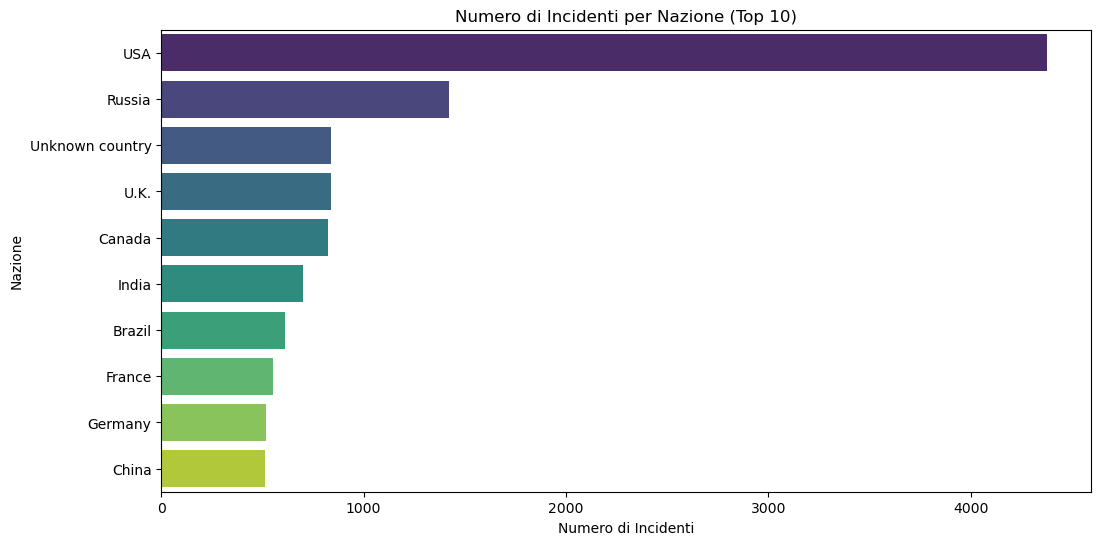

In [4]:
plot_incidents_by_country(df)

In [ ]:
# In quale nazione si sono verificati più incidenti?
# Come possiamo notare, al di fuori dell'Europa gli incidenti sono più frequenti,
# soprattutto negli Stati Uniti. Sembra esserci una ragione dietro questa maggiore
# incidenza rispetto agli altri paesi.


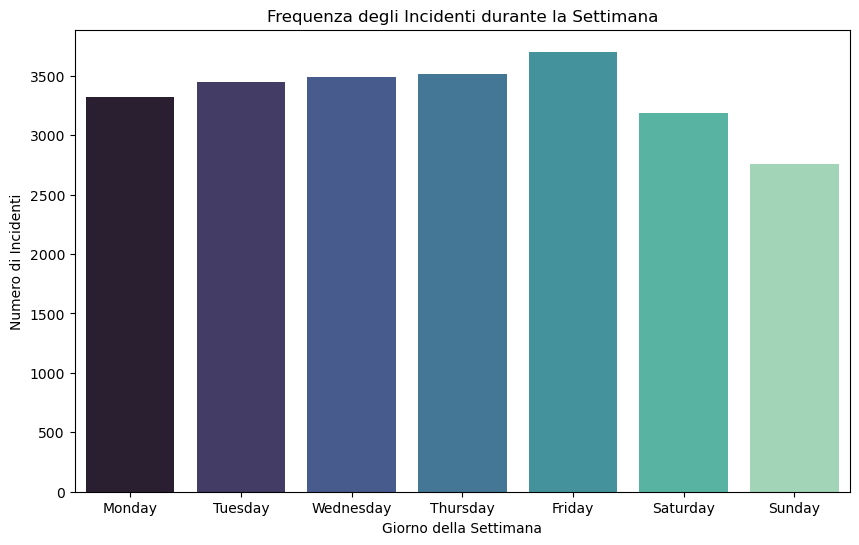

In [17]:
plot_incidents_by_day(df)

In [ ]:
#Gli incidenti avvengono più di frequente durante determinati giorni della settimana?
#Nella distribuzione degli incidenti lungo la settimana,
# non emergono significative differenze tra i vari giorni.
# Potrebbe sembrare che sabato e domenica registrino un minor
# numero di incidenti, ma ciò potrebbe essere influenzato dalla
# ridotta attività di partenza in quei due giorni.
# Esistono altri fattori per cui sabato e domenica hanno meno incidenti?


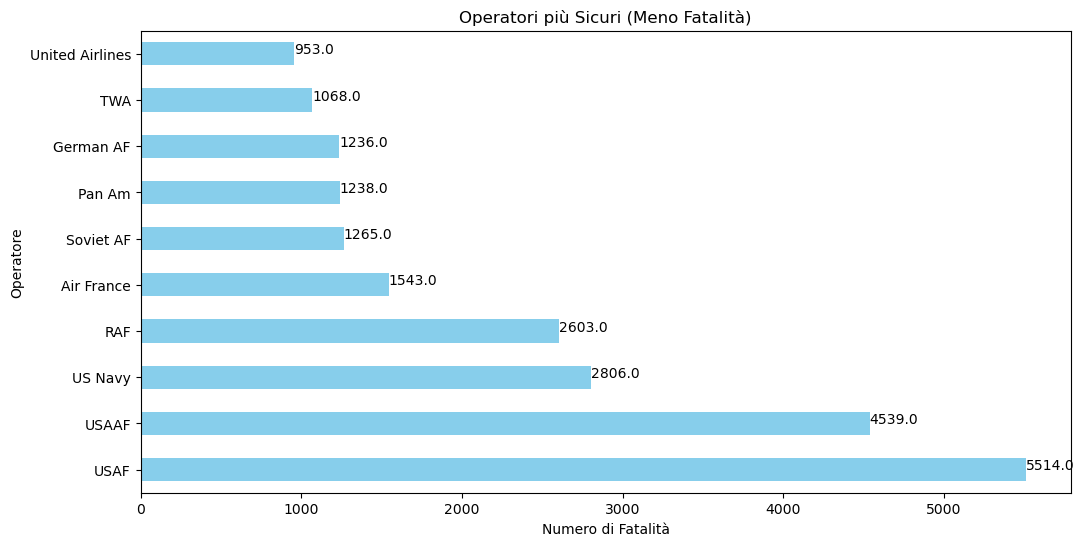

In [5]:
plot_safe_operators(df)

In [ ]:
#Quali sono gli operatori più sicuri? I dati ci dicono che la più sicura è la United Airlines 


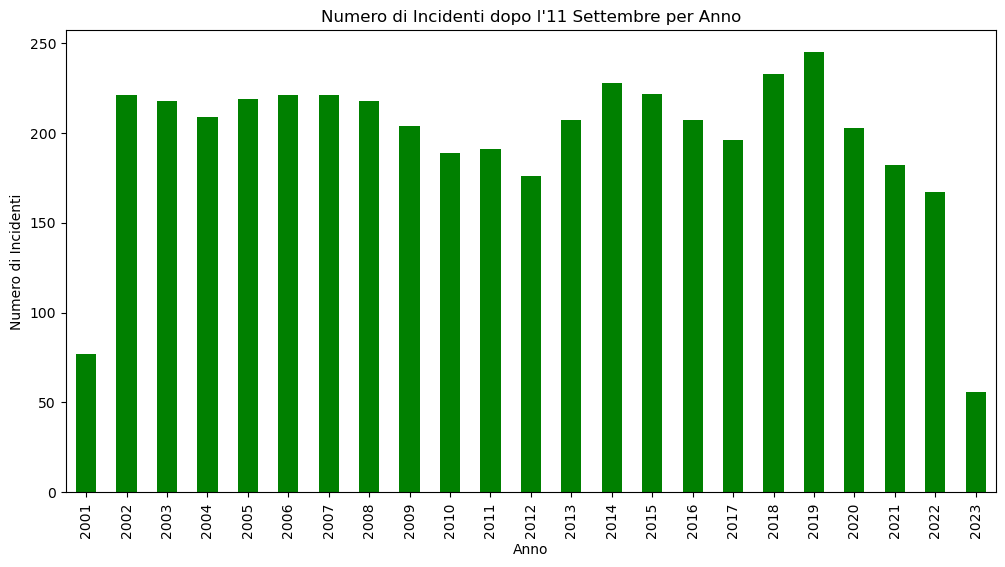

In [19]:
plot_post_9_11_incidents(df)

In [ ]:
#Come si sono evoluti gli incidenti dopo l'11 Settembre?
# Dopo l'11 settembre, si nota che la tendenza per gli incidenti viene interrotta e diminuita solo nel 2001;
# da lì in avanti, la frequenza resta più o meno la stessa. Buon lavoro nel 2023, dove rispetto agli anni precedenti
# gli incidenti si dimezzano. Sarebbe straordinario approfondire il perché di questa significativa riduzione.


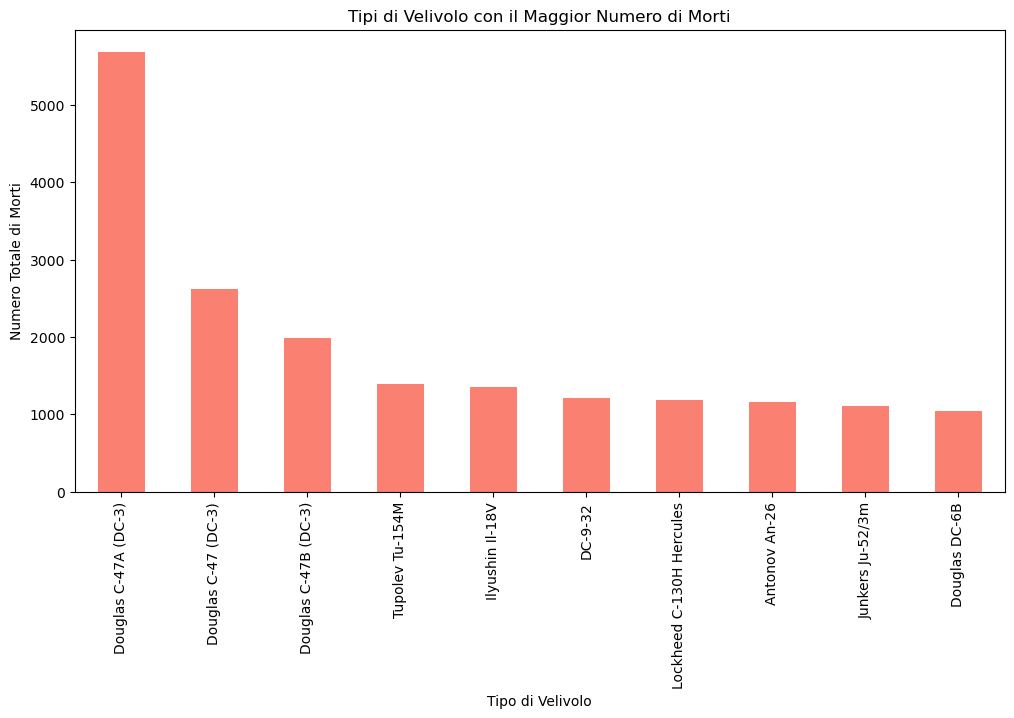

In [4]:
 Aircraft_Types_with_Highest_Number_of_Fatalities(df)

In [ ]:
#Quale tipo di velivolo ha causato più morti?
# Il grafico rende abbastanza evidente il grave problema per i paesi che hanno utilizzato quegli aerei.
# Infatti, sembra che la produzione di aerei Douglas sia stata determinante per gli incidenti aerei nei vari paesi.


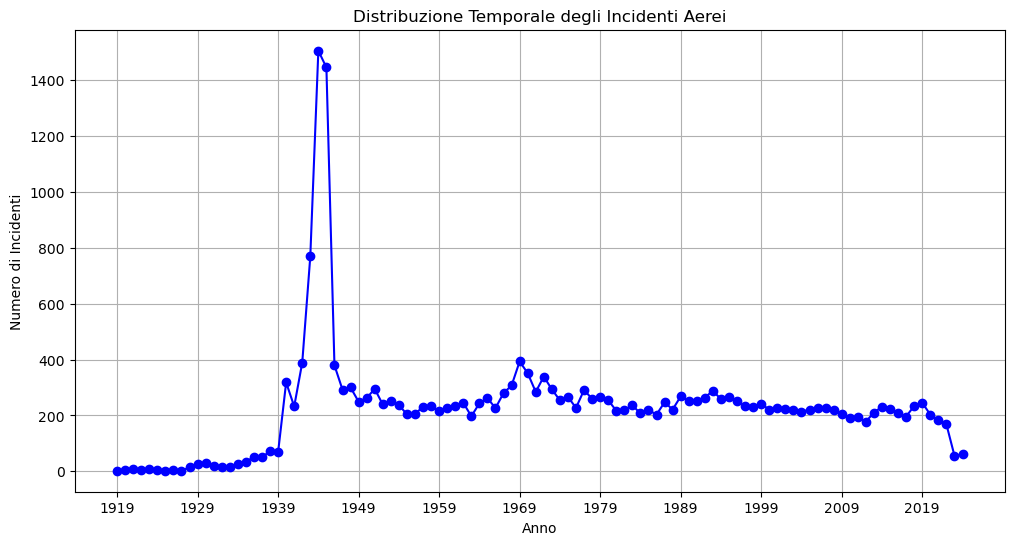

In [6]:
Temporal_Distribution_of_Aircraft_Incidents(df)

In [ ]:
# Ho condotto una breve ricerca per comprendere il motivo per cui la tendenza si alza così vertiginosamente
# circa nel 1939 al 1949. Pensavo fosse legato a qualcosa di specifico, ma sembra che l'unico dato che si ripete
# sia il modello Douglas, che in quegli anni ha registrato più incidenti fatali rispetto agli altri modelli.
